### Mayank Raj 
# Part A

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
print("Loading dataset...")
xls = pd.ExcelFile('measures 1.xlsx')

# List all sheet names
sheet_names = xls.sheet_names
print(f"Sheet names: {sheet_names}")

# Load the sheets
data_sheet1 = pd.read_excel(xls, sheet_name=0)
data_sheet2 = pd.read_excel(xls, sheet_name=1)

# Remove rows with "-", "--", "_", "—" : all the rows including garbage values
print("Cleaning data from Sheet 1...")
data_sheet1 = data_sheet1[~data_sheet1.apply(lambda row: row.astype(str).str.contains('^-?$|^--?$|^_?$|^—?$').any(), axis=1)]

print("Cleaning data from Sheet 2...")
data_sheet2 = data_sheet2[~data_sheet2.apply(lambda row: row.astype(str).str.contains('^-?$|^--?$|^_?$|^—?$').any(), axis=1)]

# Assigning features and labels for sheet 1
X1 = data_sheet1.iloc[:, :4].values
y1 = data_sheet1.iloc[:, 4].values

# Assigning features and labels for sheet 2
X2 = data_sheet2.iloc[:, :4].values
y2 = data_sheet2.iloc[:, 4].values

# Encode class labels to numerical values for sheet 1
label_encoder1 = LabelEncoder()
y1 = label_encoder1.fit_transform(y1)
y1 = tf.keras.utils.to_categorical(y1, num_classes=5)

# Encode class labels to numerical values for sheet 2
label_encoder2 = LabelEncoder()
y2 = label_encoder2.fit_transform(y2)
y2 = tf.keras.utils.to_categorical(y2, num_classes=5)

# Standardize the attributes for sheet 1
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Standardize the attributes for sheet 2
scaler2 = StandardScaler()
X2 = scaler2.fit_transform(X2)

# Split the datasets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)



# Model 1

In [ ]:

# Design the MLP model
model1 = Sequential()
model1.add(Dense(128, input_dim=X1.shape[1], activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(5, activation='softmax'))

# Compile the model for Sheet 1 with a lower learning rate
optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for Sheet 1 with early stopping
early_stopping1 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history1 = model1.fit(X1_train, y1_train, epochs=200, batch_size=16, validation_split=0.2, callbacks=[early_stopping1])

# Evaluate the model for Sheet 1
loss1, accuracy1 = model1.evaluate(X1_test, y1_test)
print(f'Test Accuracy for Sheet 1: {accuracy1 * 100:.2f}%')





Loading dataset...
Sheet names: ['training', 'testing']
Cleaning data from Sheet 1...
Cleaning data from Sheet 2...
Epoch 1/200
11/11 [==============================] - 0s 14ms/step - loss: 1.6774 - accuracy: 0.1705 - val_loss: 1.5911 - val_accuracy: 0.1778
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 1.5818 - accuracy: 0.2102 - val_loss: 1.5789 - val_accuracy: 0.2667
Epoch 3/200
11/11 [==============================] - 0s 5ms/step - loss: 1.5752 - accuracy: 0.2614 - val_loss: 1.5730 - val_accuracy: 0.2667
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 1.5592 - accuracy: 0.2955 - val_loss: 1.5637 - val_accuracy: 0.2667
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 1.5480 - accuracy: 0.2443 - val_loss: 1.5525 - val_accuracy: 0.2667
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 1.5413 - accuracy: 0.2727 - val_loss: 1.5418 - val_accuracy: 0.2667
Epoch 7/200
11/11 [==================

In [8]:

loss2, accuracy2 = model1.evaluate(X2, y2)
print(f'Test Accuracy for Sheet 1: {accuracy2 * 100:.2f}%')

2/2 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.2542
Test Accuracy for Sheet 1: 25.42%


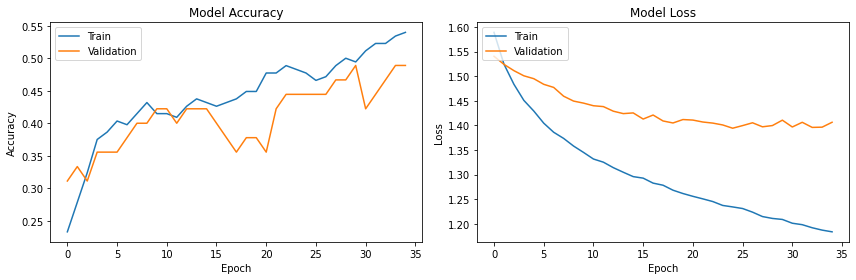

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Model 2

In [12]:
model2 = Sequential() 
model2.add(Dense(64, input_dim=X1.shape[1], activation='relu')) 
model2.add(Dense(32, activation='relu')) 
model2.add(Dense(5, activation='softmax')) 

optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.001) 
model2.compile(optimizer=optimizer1, loss='categorical_crossentropy', metrics=['accuracy']) 
early_stopping2 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) 
history2 = model2.fit(X1_train, y1_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping2]) 
loss4, accuracy3 = model2.evaluate(X1_test, y1_test) 
print(f'Test Accuracy for Sheet 1: {accuracy3 * 100:.2f}%')

Epoch 1/100
11/11 [==============================] - 0s 13ms/step - loss: 1.5591 - accuracy: 0.3239 - val_loss: 1.5814 - val_accuracy: 0.1778
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 1.4460 - accuracy: 0.3580 - val_loss: 1.5222 - val_accuracy: 0.3111
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 1.3796 - accuracy: 0.3977 - val_loss: 1.4462 - val_accuracy: 0.3778
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 1.3447 - accuracy: 0.3977 - val_loss: 1.4284 - val_accuracy: 0.4222
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 1.3201 - accuracy: 0.4091 - val_loss: 1.4292 - val_accuracy: 0.4444
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 1.2954 - accuracy: 0.4318 - val_loss: 1.4347 - val_accuracy: 0.4222
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 1.2754 - accuracy: 0.4489 - val_loss: 1.4187 - val_accuracy: 0.4667
Epoch 8/100


In [13]:

loss4, accuracy4 = model2.evaluate(X2, y2)
print(f'Test Accuracy for Sheet 1: {accuracy4 * 100:.2f}%')

2/2 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2373
Test Accuracy for Sheet 1: 23.73%


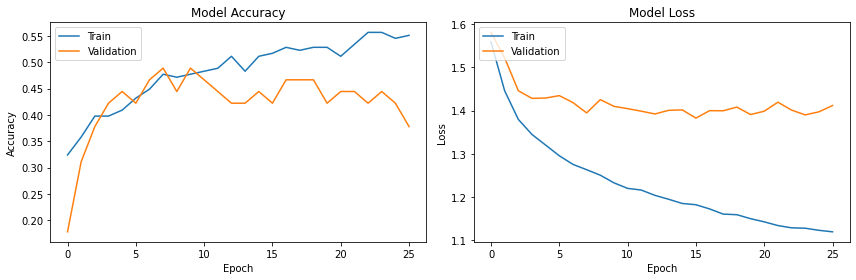

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# conclusion
In conclusion, despite applying different levels of model complexity, both the complex and simpler Multi-Layer Perceptron (MLP) models yielded relatively low test accuracies (25.42% and 23.73%, respectively). These results indicate that neither model was effectively able to classify the given data. It suggests that further fine-tuning, improved feature engineering, or potentially different modeling approaches might be necessary to achieve better performance. The persistent issue with the loss values turning into 'nan' also points towards possible data preprocessing errors or model configuration issues that require closer inspection and resolution.